In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dist_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/elong_rates/analyse_x0_x1/constant'
import glob
fn_list = glob.glob(dist_folder + '/*.csv.gz')

def read_one_file(fn):
    df = pd.read_csv(fn,header = 0, index_col =None, sep = '\t', compression='gzip')
    df['txrate'] = df['true_distance']/ 5/ 1000
    df['no_reads_FE'] = df['distance_no_reads']/df['true_distance']
    df['paired_end_FE'] = df['distance_with_reads']/df['true_distance']
    return df

df_list = list(map(lambda x: read_one_file(x), fn_list))
df = pd.concat(df_list)

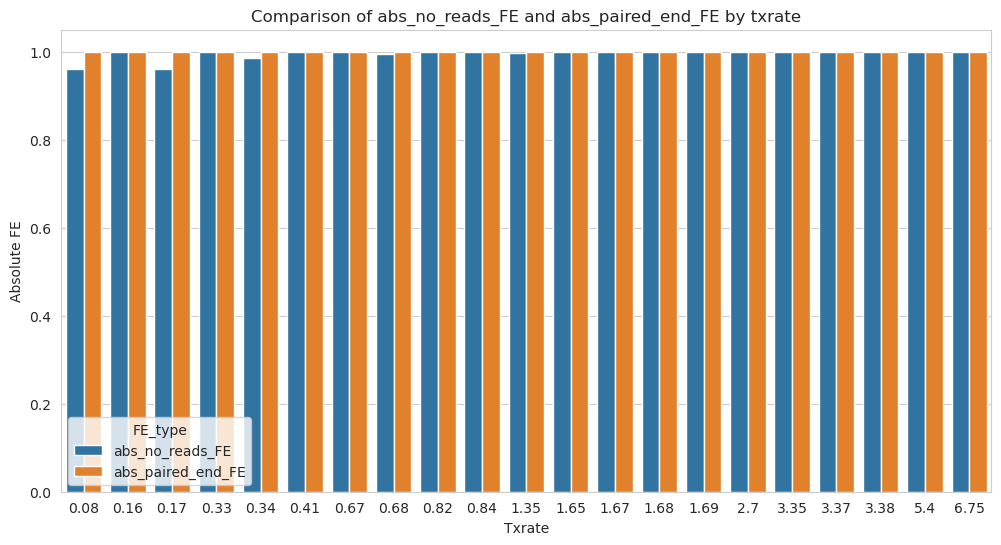

In [8]:
# group by txrate, for each txrate, calculate the mean and std of abs(no_reads_FE-1) and abs(paired_end_FE-1) 
# plot it to a barplot
df['abs_no_reads_FE'] = np.abs(df['no_reads_FE']-1)
df['abs_paired_end_FE'] = np.abs(df['paired_end_FE']-1)
df['txrate']= df['txrate'].round(2)
df_long = pd.melt(df, id_vars=['txrate'], value_vars=['abs_no_reads_FE','abs_paired_end_FE'], var_name='FE_type', value_name='abs_FE')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='txrate', y='abs_FE', hue='FE_type')

# Customize the plot (optional)
plt.title('Comparison of abs_no_reads_FE and abs_paired_end_FE by txrate')
plt.xlabel('Txrate')
plt.ylabel('Absolute FE')

# Show the plot
plt.show()

In [7]:
df_long

,txrate,FE_type,abs_FE
0,0.34,abs_no_reads_FE,0.980007
1,0.34,abs_no_reads_FE,0.980008
2,0.34,abs_no_reads_FE,0.980009
3,0.34,abs_no_reads_FE,0.980010
4,0.34,abs_no_reads_FE,0.980011
...,...,...,...
29431,0.41,abs_paired_end_FE,0.998992
29432,0.41,abs_paired_end_FE,0.998994
29433,0.41,abs_paired_end_FE,0.998996
29434,0.41,abs_paired_end_FE,0.998997
